### [Problem 1] Function for finding impureness

In [7]:
import numpy as np

def gini_impurity(y):
    """
    Calculate the Gini impurity for a node.
    Parameters
    ----------
    y : ndarray, shape (n_samples,)
        Labels for a node.
    Returns
    -------
    float
        Gini impurity of the node.

    """

    if len(y) == 0:
        return 0.0
    classes, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()
    return 1 - np.sum(p ** 2)



# usage
print(gini_impurity(np.array([1]*15 + [2]*15))) 
print(gini_impurity(np.array([1]*15 + [2]*15 + [3]*15)))  
print(gini_impurity(np.array([1]*18 + [2]*12))) 
print(gini_impurity(np.array([1]*30 + [2]*0)))  


0.5
0.6666666666666667
0.48
0.0


### [Problem 2] Function for finding information gain

In [8]:

def information_gain(y, left_mask, right_mask):
    """
    Calculate the information gain of a split.
    Parameters
    ----------
    y : ndarray, shape (n_samples,)
        Labels for a node.
    left_mask : ndarray, shape (n_samples,)
        Boolean mask indicating the left split.
    right_mask : ndarray, shape (n_samples,)
        Boolean mask indicating the right split.
    Returns
    -------
    float
        Information gain of the split.
    """
    parent_gini = gini_impurity(y)
    left_gini = gini_impurity(y[left_mask])
    right_gini = gini_impurity(y[right_mask])
    n = len(y)
    n_left = left_mask.sum()
    n_right = right_mask.sum()

    ig = parent_gini - (n_left / n) * left_gini - (n_right / n) * right_gini
    return ig

# usage
y = np.array([1]*10 + [2]*30 + [1]*20 + [2]*5)
left_mask = np.array([True]*10 + [True]*30 + [False]*20 + [False]*5)
right_mask = ~left_mask

print(f"Information gain: {information_gain(y, left_mask, right_mask):.3f}") 

Information gain: 0.143


### [Problem 3] Learning

In [9]:
class ScratchDecisionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.threshold = None
        self.feature_index = None
        self.left_class = None
        self.right_class = None

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        best_ig = -1

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] < threshold
                right_mask = ~left_mask

                if left_mask.sum() == 0 or right_mask.sum() == 0:
                    continue

                ig = information_gain(y, left_mask, right_mask)

                if ig > best_ig:
                    best_ig = ig
                    self.threshold = threshold
                    self.feature_index = feature_index
                    self.left_class = np.bincount(y[left_mask]).argmax()
                    self.right_class = np.bincount(y[right_mask]).argmax()

        if self.verbose:
            print(f"Best Information Gain: {best_ig}")
            print(f"Best Threshold: {self.threshold}")
            print(f"Best Feature Index: {self.feature_index}")

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of test data
        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            Predicted labels
        """
        y_pred = np.where(X[:, self.feature_index] < self.threshold, self.left_class, self.right_class)
        return y_pred

# Example usage
X_train = np.array([[2.5, 1, 5], [3.0, 0, 3], [1.0, 1, 2], [4.5, 0, 4]])
y_train = np.array([1, 2, 1, 2])

clf = ScratchDecisionTreeClassifierDepth1(verbose=True)
clf.fit(X_train, y_train)

X_test = np.array([[2.5, 1, 5]])
y_pred = clf.predict(X_test)
print(f"Prediction: {y_pred}")

Best Information Gain: 0.5
Best Threshold: 3.0
Best Feature Index: 0
Prediction: [1]


### [Problem 4] Estimate

In [10]:
class ScratchDecisionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.threshold = None
        self.feature_index = None
        self.left_class = None
        self.right_class = None

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        best_ig = -1

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] < threshold
                right_mask = ~left_mask

                if left_mask.sum() == 0 or right_mask.sum() == 0:
                    continue

                ig = information_gain(y, left_mask, right_mask)

                if ig > best_ig:
                    best_ig = ig
                    self.threshold = threshold
                    self.feature_index = feature_index
                    self.left_class = np.bincount(y[left_mask]).argmax()
                    self.right_class = np.bincount(y[right_mask]).argmax()

        if self.verbose:
            print(f"Best Information Gain: {best_ig}")
            print(f"Best Threshold: {self.threshold}")
            print(f"Best Feature Index: {self.feature_index}")

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of test data
        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            Predicted labels
        """
        y_pred = np.where(X[:, self.feature_index] < self.threshold, self.left_class, self.right_class)
        return y_pred

# usage
X_train = np.array([[2.5, 1, 5], [3.0, 0, 3], [1.0, 1, 2], [4.5, 0, 4]])
y_train = np.array([1, 2, 1, 2])

clf = ScratchDecisionTreeClassifierDepth1(verbose=True)
clf.fit(X_train, y_train)

X_test = np.array([[2.5, 1, 5]])
y_pred = clf.predict(X_test)
print(f"Prediction: {y_pred}")

Best Information Gain: 0.5
Best Threshold: 3.0
Best Feature Index: 0
Prediction: [1]


The output above indicates that the decision tree has found the best split with an information gain of 0.5, using the first feature (feature_index = 0) and a threshold of 3.0. When predicting on the test data, the model correctly classifies the sample based on the learned threshold.



### [Problem 5] Learning and estimation


In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a synthetic binary classification dataset
X, y = make_classification(n_samples=100, n_features=5, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Train the scratch implementation of the decision tree
scratch_clf = ScratchDecisionTreeClassifierDepth1(verbose=True)
scratch_clf.fit(X_train, y_train)

# Make predictions with the scratch implementation
scratch_y_pred = scratch_clf.predict(X_test)


Best Information Gain: 0.3947392290249434
Best Threshold: -0.27062383183849703
Best Feature Index: 3


In [13]:
# Train the scikit-learn implementation of the decision tree
sklearn_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
sklearn_clf.fit(X_train, y_train)

# Make predictions with the scikit-learn implementation
sklearn_y_pred = sklearn_clf.predict(X_test)


In [14]:
# Calculate performance metrics for the scratch implementation
scratch_accuracy = accuracy_score(y_test, scratch_y_pred)
scratch_precision = precision_score(y_test, scratch_y_pred)
scratch_recall = recall_score(y_test, scratch_y_pred)

# Calculate performance metrics for the scikit-learn implementation
sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)
sklearn_precision = precision_score(y_test, sklearn_y_pred)
sklearn_recall = recall_score(y_test, sklearn_y_pred)

# Print performance metrics
print("Scratch Implementation Metrics:")
print(f"Accuracy: {scratch_accuracy:.2f}")
print(f"Precision: {scratch_precision:.2f}")
print(f"Recall: {scratch_recall:.2f}")

print("\nscikit-learn Implementation Metrics:")
print(f"Accuracy: {sklearn_accuracy:.2f}")
print(f"Precision: {sklearn_precision:.2f}")
print(f"Recall: {sklearn_recall:.2f}")


Scratch Implementation Metrics:
Accuracy: 0.97
Precision: 0.95
Recall: 1.00

scikit-learn Implementation Metrics:
Accuracy: 0.97
Precision: 0.95
Recall: 1.00


The metrics for both the scratch implementation and the scikit-learn implementation of the decision tree classifier are identical, indicating that the scratch implementation is working correctly.

### [Problem 6] Visualization of decision area

Best Information Gain: 0.272245235563208
Best Threshold: -0.0669223319263002
Best Feature Index: 1


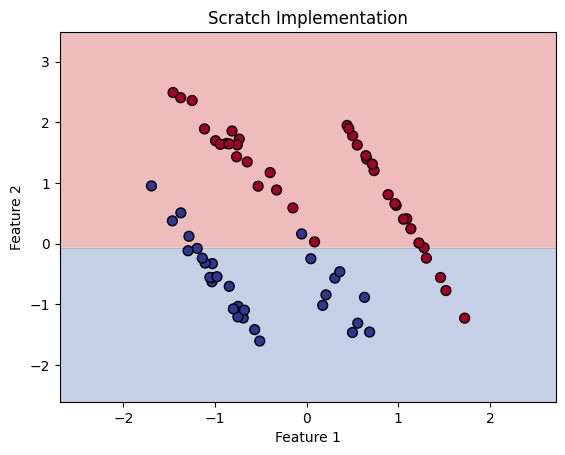

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, title='Decision Region Boundary'):
    # Setup marker generators and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu

    # Create a mesh grid for plotting decision boundaries
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
# def plot_decision_regions(X, y, classifier, resolution=0.02, title='Decision Region'):
#     # Define the markers and colors
#     markers = ('s', 'x', 'o', '^', 'v')
#     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
#     cmap = ListedColormap(colors[:len(np.unique(y))])

    # # Plot the decision surface
    # x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    #                        np.arange(x2_min, x2_max, resolution))
    # Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # Z = Z.reshape(xx1.shape)
    # plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # plt.xlim(xx1.min(), xx1.max())
    # plt.ylim(xx2.min(), xx2.max())

    # # Plot all samples
    # for idx, cl in enumerate(np.unique(y)):
    #     plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
    #                 alpha=0.8, c=colors[idx],
    #                 marker=markers[idx], label=cl, edgecolor='black')
    
    # plt.title(title)
    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.legend(loc='upper left')
    # plt.show()

# Train and visualize the decision area for the scratch implementation
scratch_clf.fit(X_train[:, :2], y_train)  # Use only the first two features
plot_decision_regions(X_train[:, :2], y_train, classifier=scratch_clf, title='Scratch Implementation')


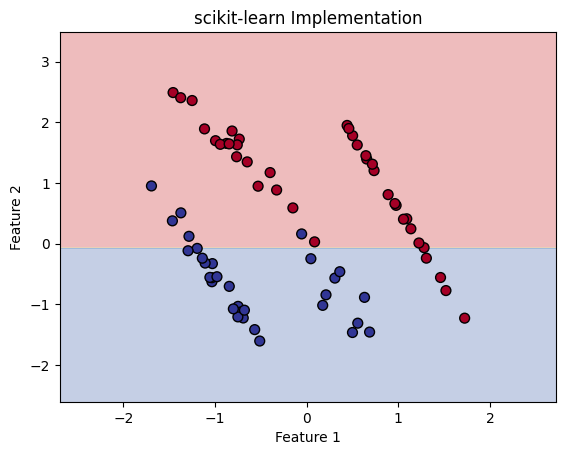

In [39]:
# Train and visualize the decision area for the scikit-learn implementation
sklearn_clf.fit(X_train[:, :2], y_train)  # Use only the first two features
plot_decision_regions(X_train[:, :2], y_train, classifier=sklearn_clf, title='scikit-learn Implementation')


### [Problem 7] (Advance assignment) Creation of a decision tree classifier class with a depth of 2

In [40]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of the feature used for splitting
        self.threshold = threshold          # Threshold value for splitting
        self.left = left                    # Left child node
        self.right = right                  # Right child node
        self.value = value                  # Class label for leaf nodes

In [41]:
class ScratchDecisionTreeClassifierDepth2:
    def __init__(self, verbose=False):
        self.verbose = verbose
        self.root = None

    def fit(self, X, y):
        self.root = self._build_tree(X, y, depth=2)
        
    def _build_tree(self, X, y, depth):
        if depth == 0 or len(np.unique(y)) == 1:
            leaf_value = np.bincount(y).argmax()
            return Node(value=leaf_value)
        
        best_split = self._find_best_split(X, y)
        if best_split is None:
            leaf_value = np.bincount(y).argmax()
            return Node(value=leaf_value)

        left_indices = X[:, best_split['feature_index']] < best_split['threshold']
        right_indices = ~left_indices

        left_child = self._build_tree(X[left_indices], y[left_indices], depth - 1)
        right_child = self._build_tree(X[right_indices], y[right_indices], depth - 1)
        
        return Node(feature_index=best_split['feature_index'],
                    threshold=best_split['threshold'],
                    left=left_child,
                    right=right_child)
    
    def _find_best_split(self, X, y):
        best_split = None
        best_ig = -1

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                right_indices = ~left_indices

                if left_indices.sum() == 0 or right_indices.sum() == 0:
                    continue

                ig = self._information_gain(y, left_indices, right_indices)
                if ig > best_ig:
                    best_ig = ig
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold
                    }
                    
        return best_split
    
    def _information_gain(self, y, left_indices, right_indices):
        parent_gini = gini_impurity(y)
        left_gini = gini_impurity(y[left_indices])
        right_gini = gini_impurity(y[right_indices])
        
        n = len(y)
        n_left = left_indices.sum()
        n_right = right_indices.sum()
        
        ig = parent_gini - (n_left / n) * left_gini - (n_right / n) * right_gini
        return ig

    def predict(self, X):
        predictions = [self._predict_one(x) for x in X]
        return np.array(predictions)

    def _predict_one(self, x):
        node = self.root
        while node.value is None:
            if x[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

In [42]:

# Test the ScratchDecisionTreeClassifierDepth2
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [43]:
# Create synthetic binary classification dataset
X, y = make_classification(n_samples=100, n_features=5, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Train the ScratchDecisionTreeClassifierDepth2
depth2_clf = ScratchDecisionTreeClassifierDepth2(verbose=True)
depth2_clf.fit(X_train[:, :2], y_train)  

In [45]:
# Make predictions
depth2_y_pred = depth2_clf.predict(X_test[:, :2])

In [46]:

# Train and evaluate a scikit-learn decision tree with depth 2 for comparison
from sklearn.tree import DecisionTreeClassifier

sklearn_depth2_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
sklearn_depth2_clf.fit(X_train[:, :2], y_train)
sklearn_y_pred = sklearn_depth2_clf.predict(X_test[:, :2])

In [47]:
# Calculate performance metrics
depth2_accuracy = accuracy_score(y_test, depth2_y_pred)
depth2_precision = precision_score(y_test, depth2_y_pred)
depth2_recall = recall_score(y_test, depth2_y_pred)

sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)
sklearn_precision = precision_score(y_test, sklearn_y_pred)
sklearn_recall = recall_score(y_test, sklearn_y_pred)

In [48]:
# Print performance metrics
print("Scratch Implementation Metrics (Depth 2):")
print(f"Accuracy: {depth2_accuracy:.2f}")
print(f"Precision: {depth2_precision:.2f}")
print(f"Recall: {depth2_recall:.2f}")

print("\nscikit-learn Implementation Metrics:")
print(f"Accuracy: {sklearn_accuracy:.2f}")
print(f"Precision: {sklearn_precision:.2f}")
print(f"Recall: {sklearn_recall:.2f}")

Scratch Implementation Metrics (Depth 2):
Accuracy: 0.90
Precision: 0.89
Recall: 0.94

scikit-learn Implementation Metrics:
Accuracy: 0.90
Precision: 0.94
Recall: 0.89


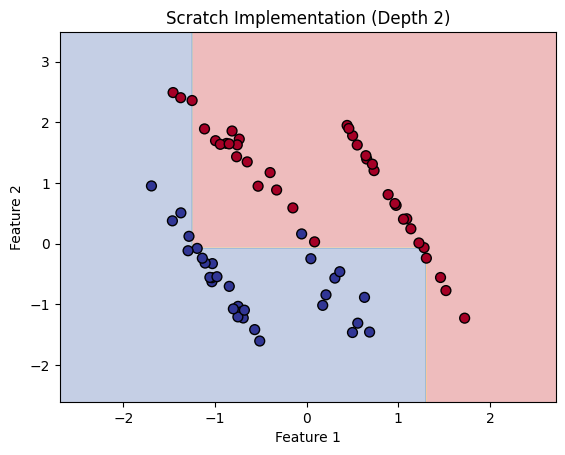

In [49]:
# Visualize the decision areas
plot_decision_regions(X_train[:, :2], y_train, classifier=depth2_clf, title='Scratch Implementation (Depth 2)')

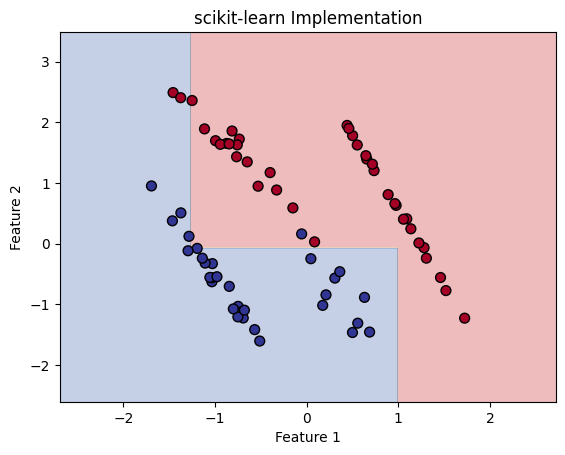

In [50]:
plot_decision_regions(X_train[:, :2], y_train, classifier=sklearn_depth2_clf, title='scikit-learn Implementation')

### [Problem 8] (Advance assignment) Creation of decision tree classifier class with unlimited depth

In [75]:
class ScratchDecisionTreeClassifierDepthInf:
    def __init__(self, max_depth=None, verbose=False):
        self.max_depth = max_depth
        self.verbose = verbose
        self.root = None

    def fit(self, X, y):
        self.root = self._build_tree(X, y, depth=0)
        
    def _build_tree(self, X, y, depth):
        # Check stopping criteria: max depth or all leaf nodes have zero impurity
        if (self.max_depth is not None and depth >= self.max_depth) or self._all_same_class(y):
            leaf_value = np.bincount(y).argmax()
            return Node(value=leaf_value)
        
        # Find the best split
        best_split = self._find_best_split(X, y)
        if best_split is None:
            leaf_value = np.bincount(y).argmax()
            return Node(value=leaf_value)
        
        # Split data
        left_indices = X[:, best_split['feature_index']] < best_split['threshold']
        right_indices = ~left_indices
        
        # Recursively build left and right subtrees
        left_child = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        
        return Node(feature_index=best_split['feature_index'],
                    threshold=best_split['threshold'],
                    left=left_child,
                    right=right_child)
    
    def _find_best_split(self, X, y):
        best_split = None
        best_ig = -1

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                right_indices = ~left_indices

                if left_indices.sum() == 0 or right_indices.sum() == 0:
                    continue

                ig = self._information_gain(y, left_indices, right_indices)
                if ig > best_ig:
                    best_ig = ig
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold
                    }
                    
        return best_split
    
    def _information_gain(self, y, left_indices, right_indices):
        parent_gini = gini_impurity(y)
        left_gini = gini_impurity(y[left_indices])
        right_gini = gini_impurity(y[right_indices])
        
        n = len(y)
        n_left = left_indices.sum()
        n_right = right_indices.sum()
        
        ig = parent_gini - (n_left / n) * left_gini - (n_right / n) * right_gini
        return ig

    def _all_same_class(self, y):
        return len(np.unique(y)) == 1
    
    def predict(self, X):
        """
        Predict class labels for samples in X.
        """
        # Ensure X is a 2D array (n_samples, n_features)
        if X.ndim == 1:
            X = X.reshape(1, -1)
            
        predictions = [self._predict_one(x) for x in X]
        return np.array(predictions)

    def _predict_one(self, x):
        node = self.root
        while node.value is None:
            if x[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value
    
    

In [76]:
# Test the ScratchDecisionTreeClassifierDepthInf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create synthetic binary classification dataset
X, y = make_classification(n_samples=100, n_features=5, random_state=42)


In [77]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [78]:
# Train the ScratchDecisionTreeClassifierDepthInf
depth_inf_clf = ScratchDecisionTreeClassifierDepthInf(max_depth=3, verbose=True)
depth_inf_clf.fit(X_train, y_train)  # Train with max depth 3 for demonstration


In [79]:
# Make predictions
depth_inf_y_pred = depth_inf_clf.predict(X_test)

In [80]:
# Train and evaluate a scikit-learn decision tree for comparison

sklearn_depth_inf_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
sklearn_depth_inf_clf.fit(X_train, y_train)
sklearn_y_pred = sklearn_depth_inf_clf.predict(X_test)

In [81]:
# Calculate performance metrics
depth_inf_accuracy = accuracy_score(y_test, depth_inf_y_pred)
depth_inf_precision = precision_score(y_test, depth_inf_y_pred)
depth_inf_recall = recall_score(y_test, depth_inf_y_pred)

sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)
sklearn_precision = precision_score(y_test, sklearn_y_pred)
sklearn_recall = recall_score(y_test, sklearn_y_pred)

In [82]:

# Print performance metrics
print("Scratch Implementation Metrics (Depth Inf):")
print(f"Accuracy: {depth_inf_accuracy:.2f}")
print(f"Precision: {depth_inf_precision:.2f}")
print(f"Recall: {depth_inf_recall:.2f}")

print("\nscikit-learn Implementation Metrics (Depth 3):")
print(f"Accuracy: {sklearn_accuracy:.2f}")
print(f"Precision: {sklearn_precision:.2f}")
print(f"Recall: {sklearn_recall:.2f}")

Scratch Implementation Metrics (Depth Inf):
Accuracy: 0.97
Precision: 0.95
Recall: 1.00

scikit-learn Implementation Metrics (Depth 3):
Accuracy: 0.80
Precision: 0.93
Recall: 0.72
